### Lab 2

In [2]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Get the data: 

In [3]:
def load_data():
    path = 'data/StudentsPerformance.csv'
    return pd.read_csv(path)

data = load_data()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


array([[<AxesSubplot: title={'center': 'math score'}>,
        <AxesSubplot: title={'center': 'reading score'}>],
       [<AxesSubplot: title={'center': 'writing score'}>,
        <AxesSubplot: >]], dtype=object)

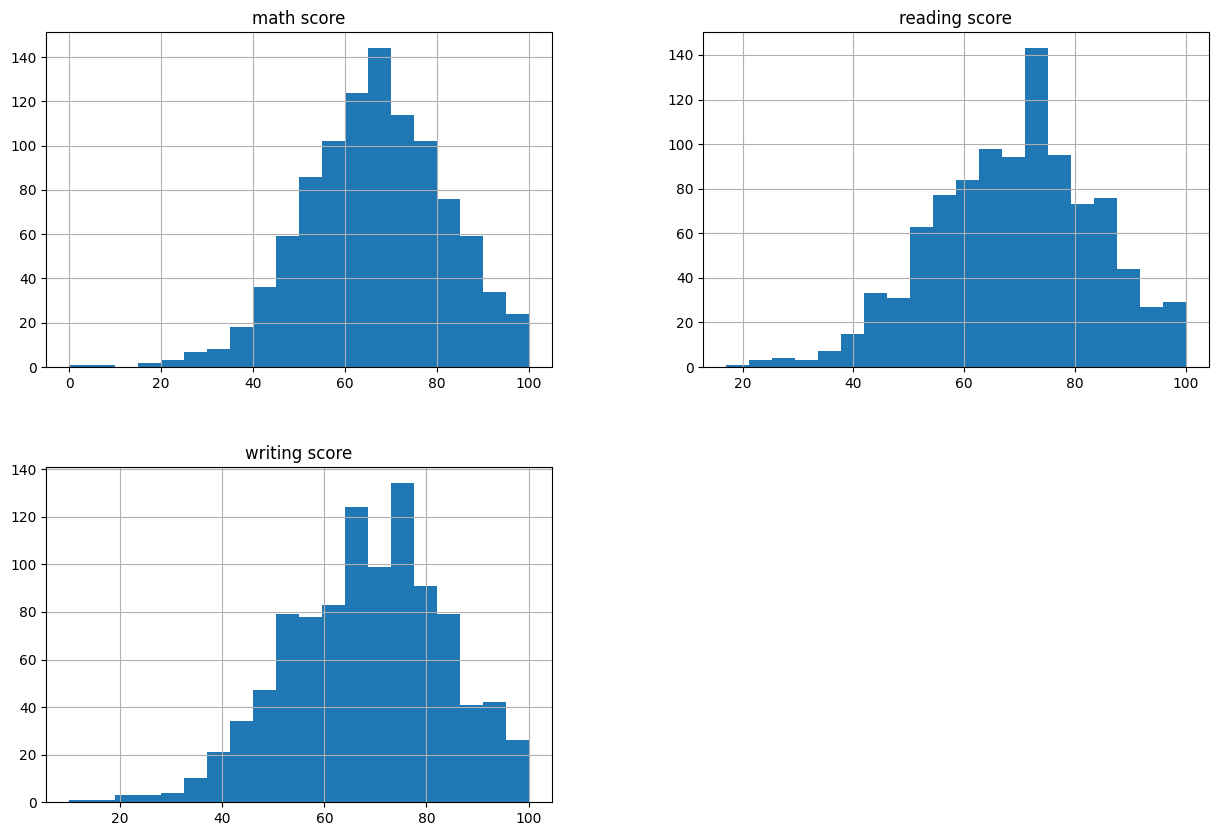

In [4]:
data.hist(bins=20, figsize=(15,10))

We can see from the scatter plot that the reading and writing scores are more correlated to each other than either with the math scores

array([[<AxesSubplot: xlabel='math score', ylabel='math score'>,
        <AxesSubplot: xlabel='reading score', ylabel='math score'>,
        <AxesSubplot: xlabel='writing score', ylabel='math score'>],
       [<AxesSubplot: xlabel='math score', ylabel='reading score'>,
        <AxesSubplot: xlabel='reading score', ylabel='reading score'>,
        <AxesSubplot: xlabel='writing score', ylabel='reading score'>],
       [<AxesSubplot: xlabel='math score', ylabel='writing score'>,
        <AxesSubplot: xlabel='reading score', ylabel='writing score'>,
        <AxesSubplot: xlabel='writing score', ylabel='writing score'>]],
      dtype=object)

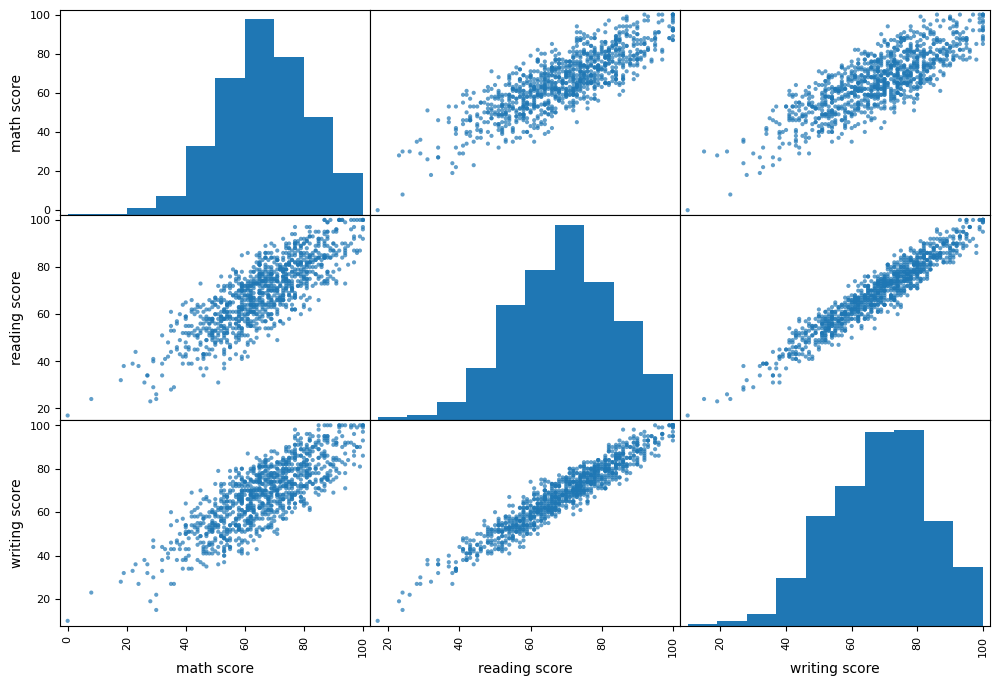

In [5]:
from pandas.plotting import scatter_matrix
test = ["math score", "reading score", "writing score"]

scatter_matrix(data[test], figsize=(12,8), alpha=0.7)

In [6]:
data["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

<AxesSubplot: >

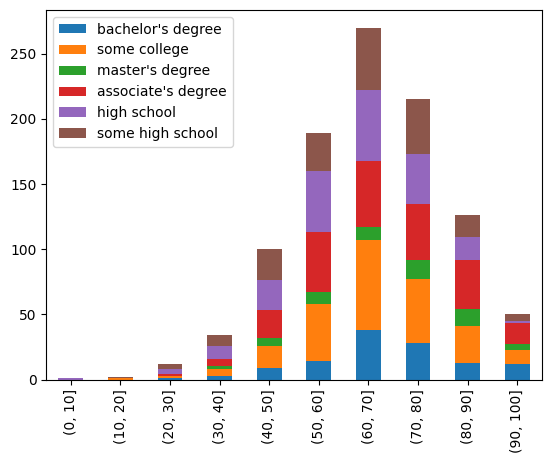

In [23]:
import math

final = {}
# This bins the data for each parental education level in ranges of 10%
for edu in data["parental level of education"].unique():
    h = data.loc[data["parental level of education"] == edu]
    eh = pd.cut(h["math score"], bins=[0,10,20,30,40,50,60,70,80,90,100], include_lowest=False)
    eh = eh.value_counts(sort=False)
    final[edu] = eh

# Create a dataframe with the binned data
t = pd.DataFrame({
    "some high school": final["some high school"],
    "high school": final["high school"],
    "some college": final["some college"],
    "associate's degree": final["associate's degree"],
    "bachelor's degree": final["bachelor's degree"],
    "master's degree": final["master's degree"]
}, columns=data["parental level of education"].unique())
t.plot.bar(stacked=True)



Should probably do something for average score rather than quantity

(0, 10]        1
(10, 20]       2
(20, 30]      10
(30, 40]      27
(40, 50]      76
(50, 60]     129
(60, 70]     173
(70, 80]     131
(80, 90]      73
(90, 100]     19
Name: math score, dtype: int64


<AxesSubplot: >

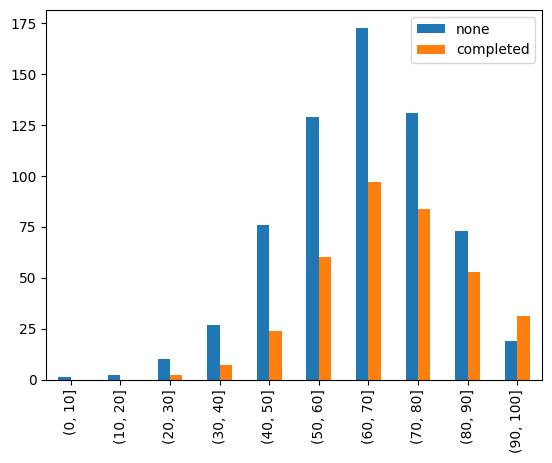

In [34]:
final = {}
for prep in data["test preparation course"].unique():
    p = data.loc[data["test preparation course"] == prep]
    p = pd.cut(p["math score"], bins=[0,10,20,30,40,50,60,70,80,90,100], include_lowest=False)
    p = p.value_counts(sort=False)
    final[prep] = p

print(final['none'])

e = pd.DataFrame({
    "completed": final["completed"],
    "none": final["none"]
},
columns=data["test preparation course"].unique())

e.plot.bar()

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000
